In [148]:
import pandas as pd
import numpy as np

In [149]:
# Install UC Irvine Machine Learning Repository
!pip install ucimlrepo

In [150]:
# import fetch_repo function from ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
tetouan = fetch_ucirepo(id=849)
  
# data (as pandas dataframes) 
X = tetouan.data.features 
y = tetouan.data.targets 
  
# metadata 
print(tetouan.metadata) 
  
# variable information 
print(tetouan.variables) 


{'uci_id': 849, 'name': 'Power Consumption of Tetouan City', 'repository_url': 'https://archive.ics.uci.edu/dataset/849/power+consumption+of+tetouan+city', 'data_url': 'https://archive.ics.uci.edu/static/public/849/data.csv', 'abstract': 'This dataset is related to power consumption of three different distribution networks of Tetouan city which is located in north Morocco.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 52417, 'num_features': 6, 'feature_types': ['Real', 'Integer'], 'demographics': [], 'target_col': ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5B034', 'creators': ['Abdulwahed Salam', 'Abdelaaziz El Hibaoui'], 'intro_paper': {'title': 'Comparison of Machine Learning Algorithms for the 

In [151]:
tetouan.data.features.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085


In [152]:
y.head()

,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,34055.69620,16128.87538,20240.96386
1,29814.68354,19375.07599,20131.08434
2,29128.10127,19006.68693,19668.43373
3,28228.86076,18361.09422,18899.27711
4,27335.69620,17872.34043,18442.40964


In [153]:
# Check for duplicates and nulls

In [154]:
X.duplicated().sum()

0

In [155]:
y.duplicated().sum()

0

In [156]:
X.isnull().sum()

DateTime                 0
Temperature              0
Humidity                 0
Wind Speed               0
general diffuse flows    0
diffuse flows            0
dtype: int64

In [157]:
y.isnull().sum()

Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

In [158]:
def explore_df(df):
    """
    Explores the dataframe via its dims, dtypes, null counts of each column,
    and value counts for each columns

    Arguments: df (pd.Dataframe) - Dataframe to explore
    Returns: None
    """
    sep_lines = '\n' + '-'*50 + '\n'
    end_lines = '\n' + '='*50 + '\n'
    print("Dataframe shape: ")
    print(f"{df.shape[0]} rows X {df.shape[1]} columns", end=end_lines)

    print("Dataframe data types")
    print(df.dtypes,end=end_lines)

    print(f"Null Count:")
    null_df = pd.concat([df.isnull().sum(), df.isnull().mean()],axis=1)
    null_df.columns = ['count','normalize_count']
    print(null_df, end=end_lines)

    print(f"{df.columns}", end=end_lines)
    print("Value counts for each  categorical column:")
    cat_from_num = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
    df_categorical = pd.concat([df.select_dtypes("object"), cat_from_num], axis=1)
    for col in df.columns:
        print(df[col].value_counts(dropna=False),end=sep_lines)

    print(end_lines.strip('\n'))
    print(df.describe(include='all'))

In [159]:
explore_df(X)

Dataframe shape: 
52416 rows X 6 columns
Dataframe data types
DateTime                  object
Temperature              float64
Humidity                 float64
Wind Speed               float64
general diffuse flows    float64
diffuse flows            float64
dtype: object
Null Count:
                       count  normalize_count
DateTime                   0              0.0
Temperature                0              0.0
Humidity                   0              0.0
Wind Speed                 0              0.0
general diffuse flows      0              0.0
diffuse flows              0              0.0
Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows'],
      dtype='object')
Value counts for each  categorical column:
DateTime
1/1/2017 0:00       1
8/31/2017 16:40     1
8/31/2017 15:00     1
8/31/2017 15:10     1
8/31/2017 15:20     1
                   ..
5/2/2017 8:20       1
5/2/2017 8:30       1
5/2/2017 8:40       1
5/2/2017 8

In [160]:
explore_df(y)

Dataframe shape: 
52416 rows X 3 columns
Dataframe data types
Zone 1 Power Consumption     float64
Zone 2  Power Consumption    float64
Zone 3  Power Consumption    float64
dtype: object
Null Count:
                           count  normalize_count
Zone 1 Power Consumption       0              0.0
Zone 2  Power Consumption      0              0.0
Zone 3  Power Consumption      0              0.0
Index(['Zone 1 Power Consumption', 'Zone 2  Power Consumption',
       'Zone 3  Power Consumption'],
      dtype='object')
Value counts for each  categorical column:
Zone 1 Power Consumption
34560.00000    30
23040.00000    24
28800.00000    19
25920.00000    18
23672.42196    13
               ..
29260.28857     1
29486.29787     1
32661.30966     1
36704.68085     1
30430.41825     1
Name: count, Length: 27709, dtype: int64
--------------------------------------------------
Zone 2  Power Consumption
21600.00000    16
25200.00000    12
14148.32827    11
23400.00000    11
22800.00000    11
    

In [161]:
# Convert X Datetime column timestamps into datetime format
X.loc[:, 'DateTime_cleaned'] = pd.to_datetime(X['DateTime'])
# Create new columns to show day of the week and category of the day from the DateTime_cleaned column
X.loc[:, 'DayOfWeek'] = X['DateTime_cleaned'].dt.day_name()
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create the 'TimeOfDay' column
X.loc[:, 'TimeOfDay'] = X['DateTime_cleaned'].dt.hour.apply(categorize_time_of_day)

C:\Users\josea\AppData\Local\Temp\ipykernel_29788\1057112463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'DateTime_cleaned'] = pd.to_datetime(X['DateTime'])
C:\Users\josea\AppData\Local\Temp\ipykernel_29788\1057112463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'DayOfWeek'] = X['DateTime_cleaned'].dt.day_name()


In [162]:
tetouan_df = pd.concat([X,y],axis=1)

In [163]:
# tetouan_df_cleaned = tetouan_df.drop(columns=['DayCategory','DateTime2'],inplace=True)

# Get_dummies for categorical columns
tetouan_df_cleaned = pd.get_dummies(tetouan_df, columns=['DayOfWeek','TimeOfDay'])
# Reorganize the 3 power consumption to the end of the column list 
# Ensure all columns exist in the DataFrame
expected_columns = [
    'DateTime_cleaned', 'Temperature', 'Humidity', 'Wind Speed',
    'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 
    'DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday', 
    'DayOfWeek_Sunday', 'TimeOfDay_Morning', 'TimeOfDay_Afternoon', 
    'TimeOfDay_Evening', 'TimeOfDay_Night', 
    'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'
]

# Select only the expected columns
tetouan_df_cleaned = tetouan_df_cleaned[expected_columns]

# Display the first few rows of the cleaned DataFrame
tetouan_df_cleaned.head()

,DateTime_cleaned,Temperature,Humidity,Wind Speed,DayOfWeek_Monday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday,TimeOfDay_Morning,TimeOfDay_Afternoon,TimeOfDay_Evening,TimeOfDay_Night,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,False,False,False,False,False,False,True,False,False,False,True,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,False,False,False,False,False,False,True,False,False,False,True,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,False,False,False,False,False,False,True,False,False,False,True,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,False,False,False,False,False,False,True,False,False,False,True,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,False,False,False,False,False,False,True,False,False,False,True,27335.69620,17872.34043,18442.40964


In [164]:
def rename_col(pc_data_col:str):
    """
    Renames columns in the power consumption dataframe
    
    Arguments : pc_data_col  - column in power comsumption dataframe
    Returns : Str - reformatted column
    """
    if pc_data_col == 'DateTime_cleaned':
        return 'DateTime' 
    if pc_data_col == 'Temperature':
        return 'Temp'
    if pc_data_col == 'Wind Speed':
        return 'Wind_Speed'
    if 'Zone' in pc_data_col:
        zone = pc_data_col.split('Power Consumption')[0].strip().replace(' ', '_')
        return zone + '_PC'
    if 'Day' in pc_data_col and '_' in pc_data_col:
        return pc_data_col.split('_')[1]
    return pc_data_col

In [165]:
tetouan_df_cleaned.columns = [rename_col(col) for col in tetouan_df_cleaned.columns]
tetouan_df_cleaned.columns

Index(['DateTime', 'Temp', 'Humidity', 'Wind_Speed', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Morning',
       'Afternoon', 'Evening', 'Night', 'Zone_1_PC', 'Zone_2_PC', 'Zone_3_PC'],
      dtype='object')

In [166]:
# Convert temperature from C to F 
def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32
tetouan_df_cleaned['Temp'] = tetouan_df_cleaned['Temp'].apply(celsius_to_fahrenheit)
tetouan_df_cleaned.head()

,DateTime,Temp,Humidity,Wind_Speed,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Morning,Afternoon,Evening,Night,Zone_1_PC,Zone_2_PC,Zone_3_PC
0,2017-01-01 00:00:00,43.8062,73.8,0.083,False,False,False,False,False,False,True,False,False,False,True,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,43.5452,74.5,0.083,False,False,False,False,False,False,True,False,False,False,True,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,43.3634,74.5,0.080,False,False,False,False,False,False,True,False,False,False,True,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,43.0178,75.0,0.083,False,False,False,False,False,False,True,False,False,False,True,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,42.6578,75.7,0.081,False,False,False,False,False,False,True,False,False,False,True,27335.69620,17872.34043,18442.40964


In [167]:
tetouan_df_cleaned.columns

Index(['DateTime', 'Temp', 'Humidity', 'Wind_Speed', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Morning',
       'Afternoon', 'Evening', 'Night', 'Zone_1_PC', 'Zone_2_PC', 'Zone_3_PC'],
      dtype='object')

In [168]:
# tetouan_df_cleaned.rename(columns= {'DateTime_cleaned':'DateTime', 
#                                     'Temperature':'Temp', 
#                                     'Wind Speed':'Wind_Speed',
#                                     'DayOfWeek_Monday':'Monday',
#                                     'DayOfWeek_Tuesday':'Tuesday',
#                                     'DayOfWeek_Wednesday':'Wednesday',
#                                     'DayOfWeek_Thursday':'Thursday', 
#                                     'DayOfWeek_Friday':'Friday', 
#                                     'DayOfWeek_Saturday': 'Saturday',
#                                     'DayOfWeek_Sunday': 'Sunday', 
#                                     'TimeOfDay_Morning' : 'Morning', 
#                                     'TimeOfDay_Afternoon': 'Afternoon',
#                                     'TimeOfDay_Evening': 'Evening', 
#                                     'TimeOfDay_Night': 'Night', 
#                                     'Zone 1 Power Consumption': 'Zone_1_PC',
#                                     'Zone 2  Power Consumption': 'Zone_2_PC', 
#                                     'Zone 3  Power Consumption': 'Zone_3_PC'},
#                                     inplace=True)

In [169]:
# Converting columns from boolean to int
columns_to_convert = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Morning', 'Afternoon', 'Evening', 'Night']
for column in columns_to_convert:
    tetouan_df_cleaned[column] = tetouan_df_cleaned[column].astype(int)

In [170]:
# Convert DateTime columns into months and season column
tetouan_df_cleaned['Month'] = tetouan_df_cleaned['DateTime'].dt.month
tetouan_df_cleaned.head()

,DateTime,Temp,Humidity,Wind_Speed,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Morning,Afternoon,Evening,Night,Zone_1_PC,Zone_2_PC,Zone_3_PC,Month
0,2017-01-01 00:00:00,43.8062,73.8,0.083,0,0,0,0,0,0,1,0,0,0,1,34055.69620,16128.87538,20240.96386,1
1,2017-01-01 00:10:00,43.5452,74.5,0.083,0,0,0,0,0,0,1,0,0,0,1,29814.68354,19375.07599,20131.08434,1
2,2017-01-01 00:20:00,43.3634,74.5,0.080,0,0,0,0,0,0,1,0,0,0,1,29128.10127,19006.68693,19668.43373,1
3,2017-01-01 00:30:00,43.0178,75.0,0.083,0,0,0,0,0,0,1,0,0,0,1,28228.86076,18361.09422,18899.27711,1
4,2017-01-01 00:40:00,42.6578,75.7,0.081,0,0,0,0,0,0,1,0,0,0,1,27335.69620,17872.34043,18442.40964,1


In [171]:
tetouan_df_cleaned.columns

Index(['DateTime', 'Temp', 'Humidity', 'Wind_Speed', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Morning',
       'Afternoon', 'Evening', 'Night', 'Zone_1_PC', 'Zone_2_PC', 'Zone_3_PC',
       'Month'],
      dtype='object')

In [172]:
columns = ['Month', 'Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Morning','Afternoon', 'Evening', 'Night', 'Temp', 'Humidity', 'Wind_Speed', 'Zone_1_PC', 'Zone_2_PC', 'Zone_3_PC'
       ]
tetouan_df_cleaned = tetouan_df_cleaned[columns]

In [173]:
from sklearn.model_selection import train_test_split
features = tetouan_df_cleaned.drop(columns = ["Zone_1_PC","Zone_2_PC","Zone_3_PC"])
targets = ["Zone_1_PC","Zone_2_PC","Zone_3_PC"]
target = tetouan_df_cleaned[targets]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

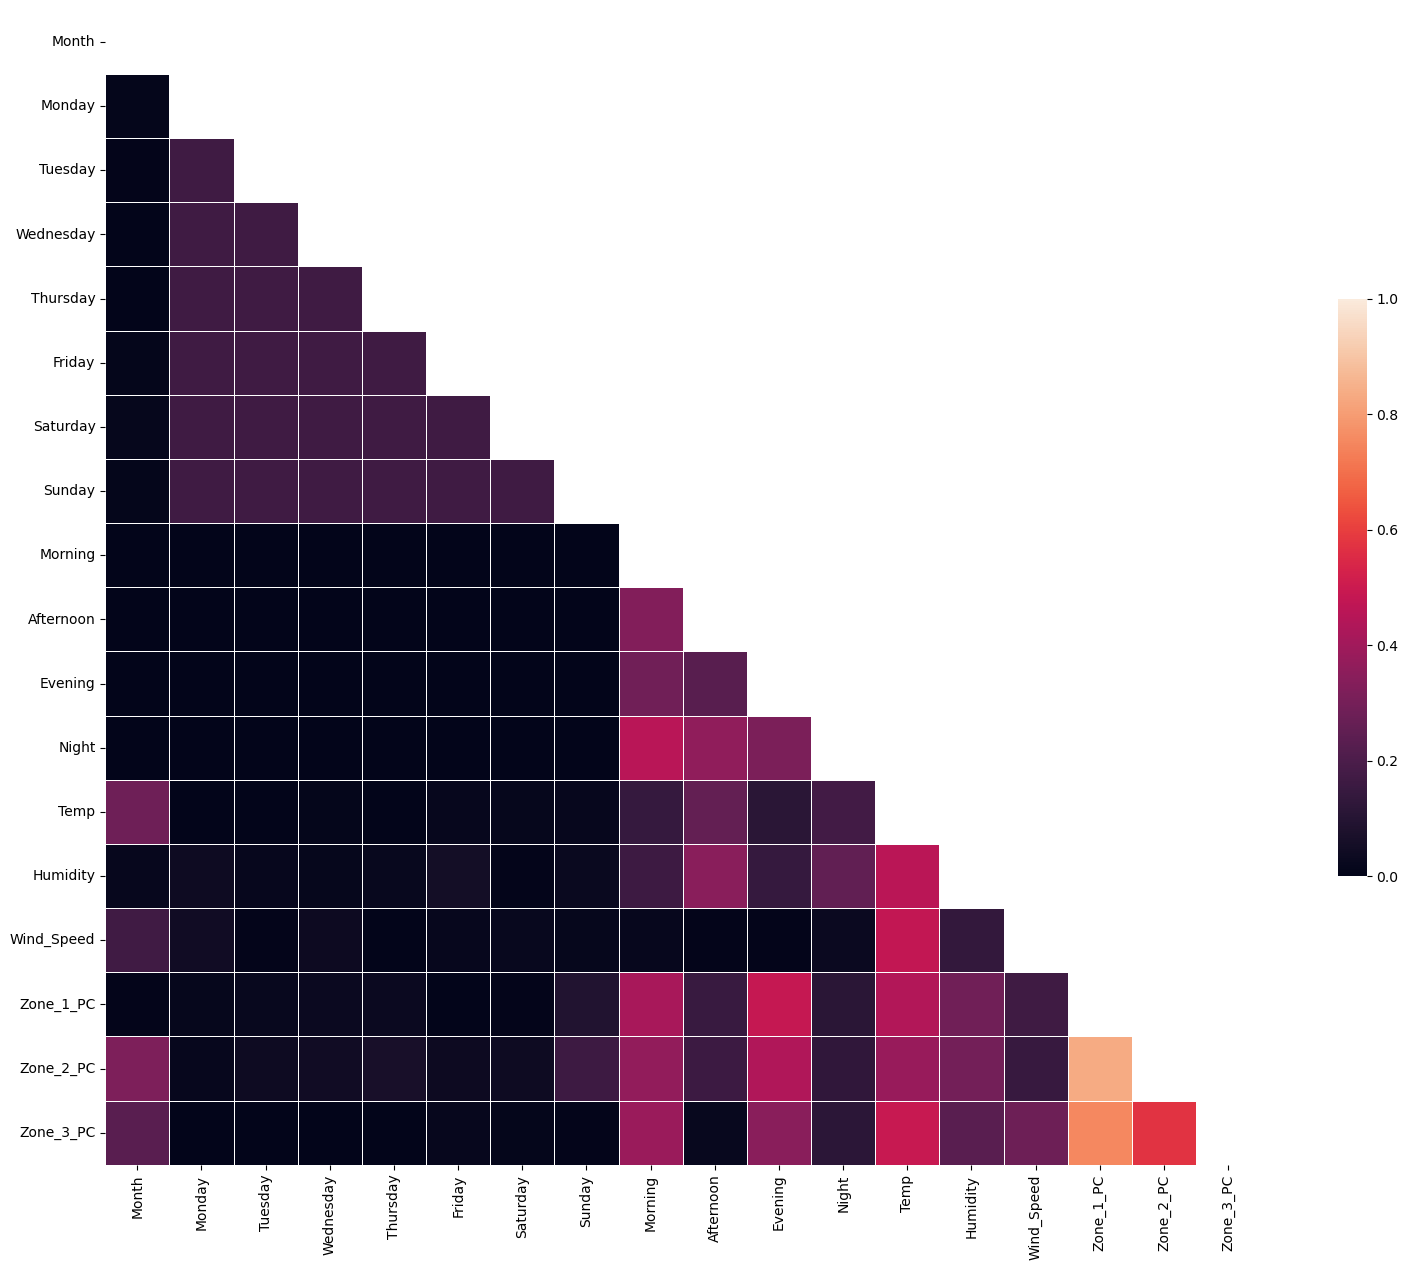

In [174]:
# Diffuse flows vs general diffuse flows ? 
# amount of diffuse solar radiation received ? compare to the general diffuse radiation
import seaborn as sns
import matplotlib.pyplot as plt
corr=np.abs(tetouan_df_cleaned.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()